In [213]:
'''
=== === ===
Classification
=== === ===
'''

'\n=== === ===\nClassification\n=== === ===\n'

In [214]:
'''
    Data Cleaning and Preprocessing
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [215]:
# Importing the dataset
dataset = pd.read_csv('forestfires.csv')
dataset[:5]

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [216]:
#Getting Independent and Dependent(regression and categorical) Features
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday

onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
X[:1]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  7. ,  5. , 86.2, 26.2, 94.3,
         5.1,  8.2, 51. ,  6.7,  0. ]])

In [219]:
'''
#Convert to Acres then Classify Size
Class 1.A - one acre or less;
Class 2.B - more than one acre, but less than 10 acres;
Class 3.C - 10 acres or more, but less than 100 acres;
Class 4.D - 100 acres or more, but less than 300 acres;
Class 5.E - 300 acres or more, but less than 1,000 acres;
Class 6.F - 1,000 acres or more, but less than 5,000 acres;
'''
y = dataset.iloc[:, 12].values
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 1.0:
        y[i] = 1
    elif y[i] < 10.0:
        y[i] = 2
    elif y[i] < 100.0:
        y[i] = 3
    elif y[i] < 300.0:
        y[i] = 4
    elif y[i] < 1000.0:
        y[i] = 5
    elif y[i] < 5000.0:
        y[i] = 6
    else:
        y[i] = 7

'''Encoding For Classification'''
from keras.utils import np_utils
y = np_utils.to_categorical(y)
y[:1]

array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [220]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling to optimize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
'''
    Creating the ANN
'''

# Importing the Keras libraries and packages to use Tensor Flow Backend
import keras
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

# Initialising the ANN with sequence of layers (Could use a Graph)
classifier = Sequential()

# Adding the input layer and the first hidden layer
# optimal nodes in hidden layer is art (Tip: choose as avg of input+output)
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))

# Adding the hidden layers
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# Probability for the outcome 
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
413/413 [==============================] - 7s 17ms/step - loss: 0.3906 - acc: 0.8571
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3001 - acc: 0.8551
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2885 - acc: 0.8661
Epoch 4/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2851 - acc: 0.8724
Epoch 5/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2841 - acc: 0.8699
Epoch 6/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2831 - acc: 0.8703
Epoch 7/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2816 - acc: 0.8679
Epoch 8/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2805 - acc: 0.8713
Epoch 9/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2788 - acc: 0.8720
Epoch 10/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2781 - acc: 0.8741
Epoch 11/100
413/413 [================

413/413 [==============================] - 1s 2ms/step - loss: 0.2361 - acc: 0.8897
Epoch 86/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2348 - acc: 0.8907
Epoch 87/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2366 - acc: 0.8921
Epoch 88/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2345 - acc: 0.8886
Epoch 89/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2343 - acc: 0.8914
Epoch 90/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2348 - acc: 0.8897
Epoch 91/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2347 - acc: 0.8907
Epoch 92/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2326 - acc: 0.8917
Epoch 93/100
413/413 [==============================] - 1s 2ms/step - loss: 0.2342 - acc: 0.8917
Epoch 94/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2335 - acc: 0.8921
Epoch 95/100
413/413 [=====================

Accuracy: 26.92%


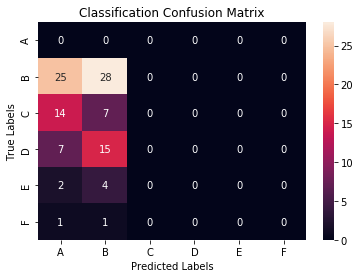

In [222]:
'''
    Making predictions and evaluating the model
'''
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

y_pred = (y_pred > 0.5)
cm = confusion_matrix( y_test.argmax(axis=1), y_pred.argmax(axis=1))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
ax.set_title('Classification Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A','B','C','D','E','F']); ax.yaxis.set_ticklabels(['A','B','C','D','E','F']);

correct = 0
total = 0
for i in range(0, len(cm)):
    for j in range(0, len(cm)):
        if(i==j):
            correct = correct + cm[i][j]
        total = total + cm[i][j]
        
Accuracy = correct/total
print('Accuracy: %.2f%%' % (Accuracy*100))

In [224]:
'''
    Evaluation
'''

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN

def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 17, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 5, epochs = 100)

accuracies_class = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv = 10, n_jobs = -1)
mean_class = accuracies_class.mean()
variance_class = accuracies_class.std()

print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Mean: 0.856097588296136
Variance: 0.011066578368320607


In [225]:
'''
=== === ===
Regression
=== === ===
'''

'''
    Data Cleaning and Preprocessing
'''

# Importing the dataset
dataset = pd.read_csv('forestfires.csv')

#Getting Independent and Dependent(regression and categorical) Features
X = dataset.iloc[:, 0:12].values # independent: upperbound is excluded 
y = dataset.iloc[:, 12].values # dependent variable

# Encoding categorical data for independent variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2]) #For month
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3]) #For weekday

onehotencoder = OneHotEncoder(categorical_features = [2])#dummy variable for month
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 
onehotencoder = OneHotEncoder(categorical_features = [13])#dummy variable for week
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #avoid dummy variable trap 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling to optimize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [226]:
'''
    Creating the ANN
'''

# Importing the Keras libraries and packages to use Tensor Flow Backend
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN
from keras.layers import Dropout #For Layers of ANN

# Initialising the ANN with sequence of layers (Could use a Graph)
regressor = Sequential()

# Adding the input layer and the first hidden layer
# optimal nodes in hidden layer is art (Tip: choose as avg of input+output)
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))

# Adding the hidden layers
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
# Probability for the outcome 
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

# Fitting the ANN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
413/413 [==============================] - 10s 24ms/step - loss: 5022.2241 - mean_squared_error: 5022.2241 - mean_absolute_error: 13.8827
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 5002.2895 - mean_squared_error: 5002.2895 - mean_absolute_error: 13.8796
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 4925.6789 - mean_squared_error: 4925.6789 - mean_absolute_error: 14.3232
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 4830.0766 - mean_squared_error: 4830.0766 - mean_absolute_error: 16.3949
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 4768.1054 - mean_squared_error: 4768.1054 - mean_absolute_error: 17.5856
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 4729.3690 - mean_squared_error: 4729.3690 - mean_absolute_error: 18.8218
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 4714.0919 - mean_squared_error: 471

413/413 [==============================] - 0s 1ms/step - loss: 4453.5182 - mean_squared_error: 4453.5182 - mean_absolute_error: 20.6743
Epoch 57/100
413/413 [==============================] - 1s 1ms/step - loss: 4452.8551 - mean_squared_error: 4452.8551 - mean_absolute_error: 20.9603
Epoch 58/100
413/413 [==============================] - 0s 1ms/step - loss: 4439.1502 - mean_squared_error: 4439.1502 - mean_absolute_error: 20.4949
Epoch 59/100
413/413 [==============================] - 1s 1ms/step - loss: 4442.5364 - mean_squared_error: 4442.5364 - mean_absolute_error: 20.5681
Epoch 60/100
413/413 [==============================] - 1s 1ms/step - loss: 4435.5914 - mean_squared_error: 4435.5914 - mean_absolute_error: 20.1310
Epoch 61/100
413/413 [==============================] - 1s 1ms/step - loss: 4429.7088 - mean_squared_error: 4429.7088 - mean_absolute_error: 20.1333
Epoch 62/100
413/413 [==============================] - 1s 1ms/step - loss: 4438.5850 - mean_squared_error: 4438.5850 -

Predicted: [[-0.20464231]
 [ 0.79766357]
 [ 3.05812   ]
 [ 4.362626  ]
 [ 3.3514383 ]]
Real: [278.53   1.9    9.27   6.1   13.05]


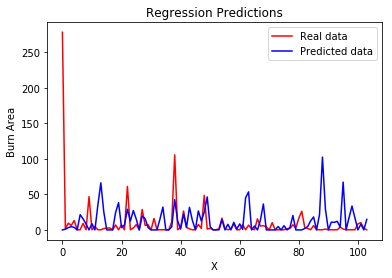

In [227]:
'''
    Making predictions and evaluating the model
'''
# Predicting the Test set results
y_pred = regressor.predict(X_test)

print('Predicted: %s' % y_pred[:5, ])
print('Real: %s' % y_test[:5, ])

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Regression Predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('Burn Area'); 
plt.show()

In [228]:
'''
    Evaluation
'''

def build_regressor():
    regressor = Sequential() 
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return regressor

regressor = KerasRegressor(build_fn = build_regressor, batch_size = 5, epochs = 100)

accuracies_reg = cross_val_score(estimator = regressor, X = X_train, y=y_train, scoring='r2',cv = 10, n_jobs = 1)
mean_reg = accuracies_reg.mean()
variance_reg = accuracies_reg.std()

print('Accuracy: %s' % accuracies_class)
print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Epoch 1/100
371/371 [==============================] - 7s 19ms/step - loss: 5452.2647 - mean_squared_error: 5452.2647 - mean_absolute_error: 14.4680
Epoch 2/100
371/371 [==============================] - 0s 1ms/step - loss: 5450.1269 - mean_squared_error: 5450.1269 - mean_absolute_error: 14.4618
Epoch 3/100
371/371 [==============================] - 0s 1ms/step - loss: 5435.8741 - mean_squared_error: 5435.8741 - mean_absolute_error: 14.4221
Epoch 4/100
371/371 [==============================] - 0s 1ms/step - loss: 5384.9464 - mean_squared_error: 5384.9464 - mean_absolute_error: 14.5475
Epoch 5/100
371/371 [==============================] - 0s 1ms/step - loss: 5265.7471 - mean_squared_error: 5265.7471 - mean_absolute_error: 15.2374
Epoch 6/100
371/371 [==============================] - 1s 2ms/step - loss: 5171.6876 - mean_squared_error: 5171.6876 - mean_absolute_error: 16.9854
Epoch 7/100
371/371 [==============================] - 1s 2ms/step - loss: 5117.0744 - mean_squared_error: 5117

371/371 [==============================] - 1s 1ms/step - loss: 4798.9674 - mean_squared_error: 4798.9674 - mean_absolute_error: 22.7960
Epoch 57/100
371/371 [==============================] - 0s 1ms/step - loss: 4802.2401 - mean_squared_error: 4802.2401 - mean_absolute_error: 22.8085
Epoch 58/100
371/371 [==============================] - 1s 2ms/step - loss: 4798.1950 - mean_squared_error: 4798.1950 - mean_absolute_error: 22.0378
Epoch 59/100
371/371 [==============================] - 1s 1ms/step - loss: 4791.1380 - mean_squared_error: 4791.1380 - mean_absolute_error: 21.7608
Epoch 60/100
371/371 [==============================] - 0s 1ms/step - loss: 4789.6907 - mean_squared_error: 4789.6907 - mean_absolute_error: 22.1036
Epoch 61/100
371/371 [==============================] - 0s 1ms/step - loss: 4789.4740 - mean_squared_error: 4789.4740 - mean_absolute_error: 21.5997
Epoch 62/100
371/371 [==============================] - 1s 1ms/step - loss: 4793.0101 - mean_squared_error: 4793.0101 -

371/371 [==============================] - 0s 1ms/step - loss: 2100.7610 - mean_squared_error: 2100.7610 - mean_absolute_error: 16.0264
Epoch 12/100
371/371 [==============================] - 0s 1ms/step - loss: 2094.3987 - mean_squared_error: 2094.3987 - mean_absolute_error: 16.1251
Epoch 13/100
371/371 [==============================] - 1s 1ms/step - loss: 2089.1598 - mean_squared_error: 2089.1598 - mean_absolute_error: 16.1104
Epoch 14/100
371/371 [==============================] - 0s 1ms/step - loss: 2087.1357 - mean_squared_error: 2087.1357 - mean_absolute_error: 16.2867
Epoch 15/100
371/371 [==============================] - 0s 1ms/step - loss: 2084.2548 - mean_squared_error: 2084.2548 - mean_absolute_error: 16.0280
Epoch 16/100
371/371 [==============================] - 0s 1ms/step - loss: 2083.3743 - mean_squared_error: 2083.3743 - mean_absolute_error: 16.3680
Epoch 17/100
371/371 [==============================] - 0s 1ms/step - loss: 2079.9134 - mean_squared_error: 2079.9134 -

371/371 [==============================] - 0s 1ms/step - loss: 2000.7831 - mean_squared_error: 2000.7831 - mean_absolute_error: 16.4670
Epoch 67/100
371/371 [==============================] - 0s 1ms/step - loss: 1997.2183 - mean_squared_error: 1997.2183 - mean_absolute_error: 16.3432
Epoch 68/100
371/371 [==============================] - 0s 1ms/step - loss: 1994.6856 - mean_squared_error: 1994.6856 - mean_absolute_error: 16.6659
Epoch 69/100
371/371 [==============================] - 0s 1ms/step - loss: 1994.3828 - mean_squared_error: 1994.3828 - mean_absolute_error: 15.8056
Epoch 70/100
371/371 [==============================] - 0s 1ms/step - loss: 1997.2346 - mean_squared_error: 1997.2346 - mean_absolute_error: 16.4440
Epoch 71/100
371/371 [==============================] - 0s 1ms/step - loss: 1990.3082 - mean_squared_error: 1990.3082 - mean_absolute_error: 16.0332
Epoch 72/100
371/371 [==============================] - 0s 1ms/step - loss: 1989.8711 - mean_squared_error: 1989.8711 -

371/371 [==============================] - 0s 1ms/step - loss: 4955.9233 - mean_squared_error: 4955.9233 - mean_absolute_error: 22.2269
Epoch 22/100
371/371 [==============================] - 0s 1ms/step - loss: 4941.0326 - mean_squared_error: 4941.0326 - mean_absolute_error: 22.0423
Epoch 23/100
371/371 [==============================] - 0s 1ms/step - loss: 4933.4386 - mean_squared_error: 4933.4386 - mean_absolute_error: 21.8120
Epoch 24/100
371/371 [==============================] - 0s 1ms/step - loss: 4940.2608 - mean_squared_error: 4940.2608 - mean_absolute_error: 21.6929
Epoch 25/100
371/371 [==============================] - 0s 1ms/step - loss: 4921.0374 - mean_squared_error: 4921.0374 - mean_absolute_error: 20.9193
Epoch 26/100
371/371 [==============================] - 0s 1ms/step - loss: 4923.8896 - mean_squared_error: 4923.8896 - mean_absolute_error: 21.8698
Epoch 27/100
371/371 [==============================] - 0s 1ms/step - loss: 4909.9096 - mean_squared_error: 4909.9096 -

371/371 [==============================] - 0s 1ms/step - loss: 4675.1816 - mean_squared_error: 4675.1816 - mean_absolute_error: 20.8462
Epoch 77/100
371/371 [==============================] - 0s 1ms/step - loss: 4682.5318 - mean_squared_error: 4682.5318 - mean_absolute_error: 21.2485
Epoch 78/100
371/371 [==============================] - 0s 1ms/step - loss: 4681.3001 - mean_squared_error: 4681.3001 - mean_absolute_error: 21.4891
Epoch 79/100
371/371 [==============================] - 1s 2ms/step - loss: 4669.7700 - mean_squared_error: 4669.7700 - mean_absolute_error: 20.4216
Epoch 80/100
371/371 [==============================] - 0s 1ms/step - loss: 4662.2888 - mean_squared_error: 4662.2888 - mean_absolute_error: 20.5068
Epoch 81/100
371/371 [==============================] - 1s 1ms/step - loss: 4661.8244 - mean_squared_error: 4661.8244 - mean_absolute_error: 20.5485
Epoch 82/100
371/371 [==============================] - 1s 2ms/step - loss: 4658.2553 - mean_squared_error: 4658.2553 -

372/372 [==============================] - 0s 1ms/step - loss: 4928.2354 - mean_squared_error: 4928.2354 - mean_absolute_error: 21.9393
Epoch 32/100
372/372 [==============================] - 0s 1ms/step - loss: 4930.4316 - mean_squared_error: 4930.4316 - mean_absolute_error: 21.4221
Epoch 33/100
372/372 [==============================] - 1s 1ms/step - loss: 4921.1625 - mean_squared_error: 4921.1625 - mean_absolute_error: 22.1267
Epoch 34/100
372/372 [==============================] - 0s 1ms/step - loss: 4920.2999 - mean_squared_error: 4920.2999 - mean_absolute_error: 21.5392
Epoch 35/100
372/372 [==============================] - 0s 1ms/step - loss: 4914.6773 - mean_squared_error: 4914.6773 - mean_absolute_error: 21.7619
Epoch 36/100
372/372 [==============================] - 0s 1ms/step - loss: 4915.6023 - mean_squared_error: 4915.6023 - mean_absolute_error: 21.3876
Epoch 37/100
372/372 [==============================] - 0s 1ms/step - loss: 4906.1913 - mean_squared_error: 4906.1913 -

372/372 [==============================] - 0s 1ms/step - loss: 4713.6168 - mean_squared_error: 4713.6168 - mean_absolute_error: 20.7411
Epoch 87/100
372/372 [==============================] - 0s 1ms/step - loss: 4715.9365 - mean_squared_error: 4715.9365 - mean_absolute_error: 21.7535
Epoch 88/100
372/372 [==============================] - 0s 1ms/step - loss: 4694.5729 - mean_squared_error: 4694.5729 - mean_absolute_error: 21.6337
Epoch 89/100
372/372 [==============================] - 0s 1ms/step - loss: 4698.0401 - mean_squared_error: 4698.0401 - mean_absolute_error: 21.1795
Epoch 90/100
372/372 [==============================] - 0s 1ms/step - loss: 4691.0416 - mean_squared_error: 4691.0416 - mean_absolute_error: 21.2419
Epoch 91/100
372/372 [==============================] - 0s 1ms/step - loss: 4684.8236 - mean_squared_error: 4684.8236 - mean_absolute_error: 21.2967
Epoch 92/100
372/372 [==============================] - 0s 1ms/step - loss: 4679.4516 - mean_squared_error: 4679.4516 -

372/372 [==============================] - 1s 1ms/step - loss: 4985.8789 - mean_squared_error: 4985.8789 - mean_absolute_error: 21.9516
Epoch 42/100
372/372 [==============================] - 1s 1ms/step - loss: 4978.1732 - mean_squared_error: 4978.1732 - mean_absolute_error: 21.7109
Epoch 43/100
372/372 [==============================] - 0s 1ms/step - loss: 4977.4271 - mean_squared_error: 4977.4271 - mean_absolute_error: 21.6820
Epoch 44/100
372/372 [==============================] - 0s 1ms/step - loss: 4980.5348 - mean_squared_error: 4980.5348 - mean_absolute_error: 21.1935
Epoch 45/100
372/372 [==============================] - 0s 1ms/step - loss: 4961.2754 - mean_squared_error: 4961.2754 - mean_absolute_error: 21.6915
Epoch 46/100
372/372 [==============================] - 0s 1ms/step - loss: 4963.0539 - mean_squared_error: 4963.0539 - mean_absolute_error: 22.1780
Epoch 47/100
372/372 [==============================] - 0s 1ms/step - loss: 4962.1607 - mean_squared_error: 4962.1607 -

372/372 [==============================] - 0s 1ms/step - loss: 4813.0976 - mean_squared_error: 4813.0976 - mean_absolute_error: 21.7063
Epoch 97/100
372/372 [==============================] - 0s 1ms/step - loss: 4815.7980 - mean_squared_error: 4815.7980 - mean_absolute_error: 22.1309
Epoch 98/100
372/372 [==============================] - 0s 1ms/step - loss: 4813.0588 - mean_squared_error: 4813.0588 - mean_absolute_error: 21.5482
Epoch 99/100
372/372 [==============================] - 1s 1ms/step - loss: 4809.9142 - mean_squared_error: 4809.9142 - mean_absolute_error: 21.7396
Epoch 100/100
372/372 [==============================] - 0s 1ms/step - loss: 4807.5586 - mean_squared_error: 4807.5586 - mean_absolute_error: 21.6274
Epoch 1/100
372/372 [==============================] - 8s 21ms/step - loss: 5570.2018 - mean_squared_error: 5570.2018 - mean_absolute_error: 15.1356
Epoch 2/100
372/372 [==============================] - 0s 1ms/step - loss: 5563.2166 - mean_squared_error: 5563.2166 -

372/372 [==============================] - 0s 1ms/step - loss: 4926.0332 - mean_squared_error: 4926.0332 - mean_absolute_error: 22.3047
Epoch 52/100
372/372 [==============================] - 0s 1ms/step - loss: 4904.4009 - mean_squared_error: 4904.4009 - mean_absolute_error: 21.9057
Epoch 53/100
372/372 [==============================] - 0s 1ms/step - loss: 4901.6260 - mean_squared_error: 4901.6260 - mean_absolute_error: 22.4205
Epoch 54/100
372/372 [==============================] - 0s 1ms/step - loss: 4907.2131 - mean_squared_error: 4907.2131 - mean_absolute_error: 22.6508
Epoch 55/100
372/372 [==============================] - 0s 1ms/step - loss: 4895.7699 - mean_squared_error: 4895.7699 - mean_absolute_error: 22.5742
Epoch 56/100
372/372 [==============================] - 0s 1ms/step - loss: 4908.4149 - mean_squared_error: 4908.4149 - mean_absolute_error: 22.6225
Epoch 57/100
372/372 [==============================] - 0s 1ms/step - loss: 4904.2696 - mean_squared_error: 4904.2696 -

372/372 [==============================] - 1s 2ms/step - loss: 3823.7116 - mean_squared_error: 3823.7116 - mean_absolute_error: 13.0471
Epoch 6/100
372/372 [==============================] - 0s 1ms/step - loss: 3772.1646 - mean_squared_error: 3772.1646 - mean_absolute_error: 13.8293
Epoch 7/100
372/372 [==============================] - 0s 1ms/step - loss: 3740.2664 - mean_squared_error: 3740.2664 - mean_absolute_error: 15.0961
Epoch 8/100
372/372 [==============================] - 1s 2ms/step - loss: 3713.4044 - mean_squared_error: 3713.4044 - mean_absolute_error: 15.6805
Epoch 9/100
372/372 [==============================] - 1s 2ms/step - loss: 3695.6091 - mean_squared_error: 3695.6091 - mean_absolute_error: 16.5338
Epoch 10/100
372/372 [==============================] - 1s 1ms/step - loss: 3683.6277 - mean_squared_error: 3683.6277 - mean_absolute_error: 16.8599
Epoch 11/100
372/372 [==============================] - 1s 1ms/step - loss: 3678.9098 - mean_squared_error: 3678.9098 - mea

372/372 [==============================] - 0s 1ms/step - loss: 3517.3917 - mean_squared_error: 3517.3917 - mean_absolute_error: 17.4131
Epoch 61/100
372/372 [==============================] - 0s 1ms/step - loss: 3519.3117 - mean_squared_error: 3519.3117 - mean_absolute_error: 17.4796
Epoch 62/100
372/372 [==============================] - 0s 1ms/step - loss: 3512.5542 - mean_squared_error: 3512.5542 - mean_absolute_error: 17.6375
Epoch 63/100
372/372 [==============================] - 0s 1ms/step - loss: 3511.9083 - mean_squared_error: 3511.9083 - mean_absolute_error: 17.6062
Epoch 64/100
372/372 [==============================] - 0s 1ms/step - loss: 3511.7917 - mean_squared_error: 3511.7917 - mean_absolute_error: 17.6508
Epoch 65/100
372/372 [==============================] - 0s 1ms/step - loss: 3512.7447 - mean_squared_error: 3512.7447 - mean_absolute_error: 17.6724
Epoch 66/100
372/372 [==============================] - 0s 1ms/step - loss: 3508.9976 - mean_squared_error: 3508.9976 -

372/372 [==============================] - 0s 1ms/step - loss: 5027.1691 - mean_squared_error: 5027.1691 - mean_absolute_error: 20.5044
Epoch 16/100
372/372 [==============================] - 0s 1ms/step - loss: 5033.5738 - mean_squared_error: 5033.5738 - mean_absolute_error: 20.5227
Epoch 17/100
372/372 [==============================] - 1s 1ms/step - loss: 5016.0769 - mean_squared_error: 5016.0769 - mean_absolute_error: 19.9991
Epoch 18/100
372/372 [==============================] - 1s 1ms/step - loss: 5012.4365 - mean_squared_error: 5012.4365 - mean_absolute_error: 20.7486
Epoch 19/100
372/372 [==============================] - 1s 2ms/step - loss: 5004.4097 - mean_squared_error: 5004.4097 - mean_absolute_error: 19.9402
Epoch 20/100
372/372 [==============================] - 1s 1ms/step - loss: 4999.6119 - mean_squared_error: 4999.6119 - mean_absolute_error: 20.9193
Epoch 21/100
372/372 [==============================] - 0s 1ms/step - loss: 4989.1791 - mean_squared_error: 4989.1791 -

372/372 [==============================] - 0s 1ms/step - loss: 4830.3736 - mean_squared_error: 4830.3736 - mean_absolute_error: 20.3892
Epoch 71/100
372/372 [==============================] - 0s 1ms/step - loss: 4827.7659 - mean_squared_error: 4827.7659 - mean_absolute_error: 20.4727
Epoch 72/100
372/372 [==============================] - 0s 1ms/step - loss: 4823.5647 - mean_squared_error: 4823.5647 - mean_absolute_error: 20.7646
Epoch 73/100
372/372 [==============================] - 0s 1ms/step - loss: 4831.1787 - mean_squared_error: 4831.1787 - mean_absolute_error: 20.8590
Epoch 74/100
372/372 [==============================] - 0s 1ms/step - loss: 4813.9135 - mean_squared_error: 4813.9135 - mean_absolute_error: 20.9990
Epoch 75/100
372/372 [==============================] - 0s 1ms/step - loss: 4814.7205 - mean_squared_error: 4814.7205 - mean_absolute_error: 21.1184
Epoch 76/100
372/372 [==============================] - 0s 1ms/step - loss: 4809.1363 - mean_squared_error: 4809.1363 -

372/372 [==============================] - 0s 1ms/step - loss: 5019.7296 - mean_squared_error: 5019.7296 - mean_absolute_error: 22.5014
Epoch 26/100
372/372 [==============================] - 1s 1ms/step - loss: 5001.0183 - mean_squared_error: 5001.0183 - mean_absolute_error: 22.0230
Epoch 27/100
372/372 [==============================] - 1s 1ms/step - loss: 4994.4057 - mean_squared_error: 4994.4057 - mean_absolute_error: 22.1866
Epoch 28/100
372/372 [==============================] - 1s 1ms/step - loss: 5000.7865 - mean_squared_error: 5000.7865 - mean_absolute_error: 21.4311
Epoch 29/100
372/372 [==============================] - 1s 1ms/step - loss: 4988.3140 - mean_squared_error: 4988.3140 - mean_absolute_error: 21.5770
Epoch 30/100
372/372 [==============================] - 1s 2ms/step - loss: 4989.0877 - mean_squared_error: 4989.0877 - mean_absolute_error: 22.3800
Epoch 31/100
372/372 [==============================] - 1s 2ms/step - loss: 4987.1957 - mean_squared_error: 4987.1957 -

372/372 [==============================] - 0s 1ms/step - loss: 4783.2511 - mean_squared_error: 4783.2511 - mean_absolute_error: 21.3800
Epoch 80/100
372/372 [==============================] - 1s 2ms/step - loss: 4775.0859 - mean_squared_error: 4775.0859 - mean_absolute_error: 21.1082
Epoch 81/100
372/372 [==============================] - 0s 1ms/step - loss: 4771.2158 - mean_squared_error: 4771.2158 - mean_absolute_error: 21.4288
Epoch 82/100
372/372 [==============================] - 0s 1ms/step - loss: 4795.2646 - mean_squared_error: 4795.2646 - mean_absolute_error: 21.1346
Epoch 83/100
372/372 [==============================] - 1s 2ms/step - loss: 4769.7607 - mean_squared_error: 4769.7607 - mean_absolute_error: 21.1904
Epoch 84/100
372/372 [==============================] - 1s 1ms/step - loss: 4758.9232 - mean_squared_error: 4758.9232 - mean_absolute_error: 21.8099
Epoch 85/100
372/372 [==============================] - 1s 2ms/step - loss: 4770.3394 - mean_squared_error: 4770.3394 -

372/372 [==============================] - 0s 1ms/step - loss: 4946.2605 - mean_squared_error: 4946.2605 - mean_absolute_error: 21.7024
Epoch 35/100
372/372 [==============================] - 0s 1ms/step - loss: 4951.0080 - mean_squared_error: 4951.0080 - mean_absolute_error: 22.8202
Epoch 36/100
372/372 [==============================] - 0s 1ms/step - loss: 4935.9642 - mean_squared_error: 4935.9642 - mean_absolute_error: 22.2612
Epoch 37/100
372/372 [==============================] - 0s 1ms/step - loss: 4940.0897 - mean_squared_error: 4940.0897 - mean_absolute_error: 22.0469
Epoch 38/100
372/372 [==============================] - 0s 1ms/step - loss: 4932.1896 - mean_squared_error: 4932.1896 - mean_absolute_error: 21.4965
Epoch 39/100
372/372 [==============================] - 0s 1ms/step - loss: 4927.9467 - mean_squared_error: 4927.9467 - mean_absolute_error: 21.8177
Epoch 40/100
372/372 [==============================] - 1s 2ms/step - loss: 4923.3119 - mean_squared_error: 4923.3119 -

372/372 [==============================] - 0s 1ms/step - loss: 4736.7925 - mean_squared_error: 4736.7925 - mean_absolute_error: 21.7011
Epoch 90/100
372/372 [==============================] - 0s 1ms/step - loss: 4718.6231 - mean_squared_error: 4718.6231 - mean_absolute_error: 21.1247
Epoch 91/100
372/372 [==============================] - 0s 1ms/step - loss: 4714.6441 - mean_squared_error: 4714.6441 - mean_absolute_error: 20.8423
Epoch 92/100
372/372 [==============================] - 1s 2ms/step - loss: 4715.4584 - mean_squared_error: 4715.4584 - mean_absolute_error: 21.2910
Epoch 93/100
372/372 [==============================] - 1s 1ms/step - loss: 4715.3326 - mean_squared_error: 4715.3326 - mean_absolute_error: 21.5589
Epoch 94/100
372/372 [==============================] - 1s 1ms/step - loss: 4718.2466 - mean_squared_error: 4718.2466 - mean_absolute_error: 21.2670
Epoch 95/100
372/372 [==============================] - 0s 1ms/step - loss: 4700.2383 - mean_squared_error: 4700.2383 -

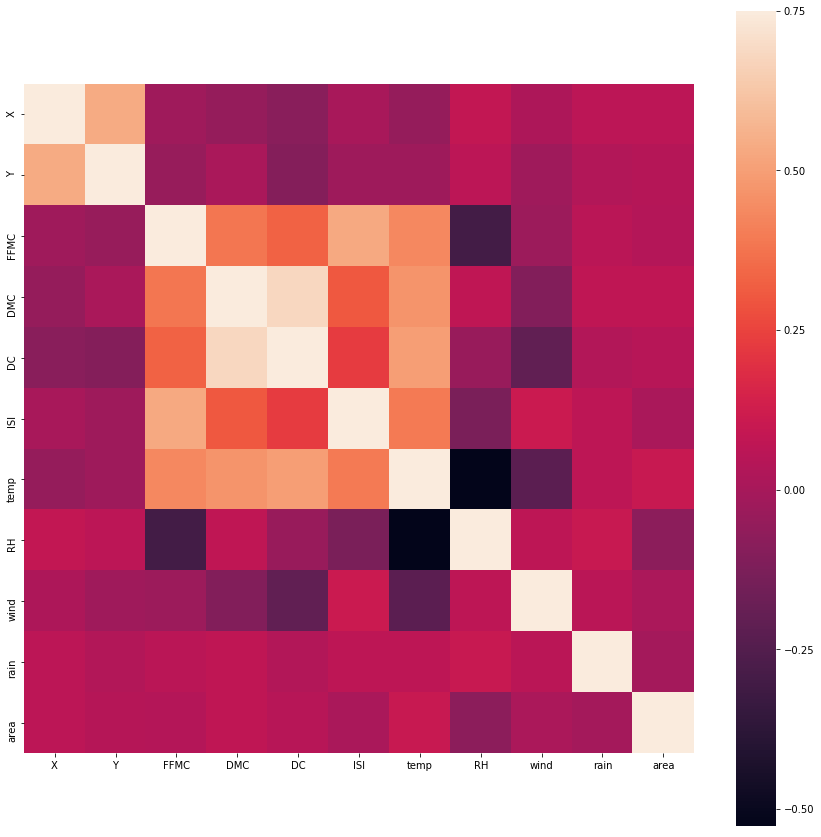

In [229]:
#Feature Selection

# plot correlation matrix
corr = dataset.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .75, square = True)
plt.show()

In [230]:
#Evaluate statistical significance of each feature using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((517, 1)).astype(int), values = X, axis = 1)

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 
              15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8689
Date:                Sun, 07 Apr 2019   Prob (F-statistic):              0.658
Time:                        00:22:53   Log-Likelihood:                -2868.3
No. Observations:                 517   AIC:                             5793.
Df Residuals:                     489   BIC:                             5912.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.1640     76.561     -0.198      0.843    -165.593     135.265
x1             5.9693     10.482      0.570      0.569     -14.625      26.564
x2            19.4099     10.062      1.929      0.054      -0.361      39.180
x3             5.1446      9.789      0.526      0.599     -14.089      24.378
x4             9.6719     11.107      0.871      0.384     -12.151      31.495
x5             7.7928     10.883      0.716      0.474     -13.590      29.176
x6             5.4791     11.405      0.480      0.631     -16.930      27.888
x7            46.8820     38.088      1.231      0.219     -27.954     121.718
x8            47.3782     36.948      1.282      0.200     -25.219     119.975
x9             5.5898     25.948      0.215      0.830     -45.394      56.573
x10           14.7691     56.406      0.262      0.794     -96.059     125.597
x11           28.8789     33.052      0.874      0.383     -36.063      93.821
x12            6.7155     30.338      0.221      0.825     -52.893      66.324
x13           -4.2226     23.414     -0.180      0.857     -50.228      41.783
x14           12.7965     50.916      0.251      0.802     -87.244     112.837
x15           -4.4101     68.378     -0.064      0.949    -138.760     129.940
x16           68.9754     45.420      1.519      0.130     -20.267     158.218
x17           73.7319     42.677      1.728      0.085     -10.120     157.584
x18            2.2558      1.498      1.506      0.133      -0.687       5.199
x19           -0.1477      2.819     -0.052      0.958      -5.686       5.391
x20           -0.0953      0.770     -0.124      0.902      -1.608       1.417
x21            0.2011      0.087      2.316      0.021       0.030       0.372
x22           -0.1288      0.059     -2.194      0.029      -0.244      -0.013
x23           -0.5442      0.831     -0.655      0.513      -2.177       1.089
x24            1.2962      1.031      1.257      0.209      -0.729       3.322
x25           -0.1348      0.288     -0.467      0.641      -0.702       0.432
x26            1.9743      1.778      1.110      0.267      -1.520       5.468
x27           -2.8154      9.926     -0.284      0.777     -22.319      16.688
==============================================================================
Omnibus:                      963.695   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729309.038
Skew:                          12.274   Prob(JB):                         0.00
Kurtosis:                     185.354   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might i

In [231]:
#Evaluate statistical significance of each feature using Backward Elimination
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    return x

#Significance Level = 15%
SL = 0.15
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 
              15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
X_Modeled = backwardElimination(X_opt, SL)
regressor_OLS = sm.OLS(endog = y, exog = X_Modeled).fit()
regressor_OLS.summary()
#class, Dummy Variable, X, Temp

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.687
Date:                Sun, 07 Apr 2019   Prob (F-statistic):             0.0120
Time:                        00:23:00   Log-Likelihood:                -2874.9
No. Observations:                 517   AIC:                             5758.
Df Residuals:                     513   BIC:                             5775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3695     11.274     -1.629      0.104     -40.518       3.779
x1            14.2762      7.538      1.894      0.059      -0.533      29.085
x2             1.8268      1.204      1.518      0.130      -0.538       4.192
x3             1.0783      0.480      2.247      0.025       0.136       2.021
==============================================================================
Omnibus:                      970.869   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           754850.116
Skew:                          12.466   Prob(JB):                         0.00
Kurtosis:                     188.526   Cond. No.                         82.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
'''
Improving and Parameter Tuning 
'''

'''CLASSIFICATION'''
#Avoid: ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets
dataset = pd.read_csv('forestfires.csv')
y = dataset.iloc[:, 12].values # dependent variable
y_Corrected = []
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 100.0:
        y[i] = 0
    else:
        y[i] = 1
y_Corrected = y.astype(int) 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y_Corrected, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Tuning For Epochs, Batch Size, Optimizer
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 16, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters: %s' % best_parameters)
print('Best Accuracy: %s' % best_accuracy)

Epoch 1/100
371/371 [==============================] - 12s 34ms/step - loss: 0.4255 - acc: 0.9380
Epoch 2/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2223 - acc: 0.9407
Epoch 3/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2178 - acc: 0.9407
Epoch 4/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2172 - acc: 0.9407
Epoch 5/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2163 - acc: 0.9407
Epoch 6/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2162 - acc: 0.9407
Epoch 7/100
371/371 [==============================] - 2s 7ms/step - loss: 0.2161 - acc: 0.9407
Epoch 8/100
371/371 [==============================] - 2s 6ms/step - loss: 0.2161 - acc: 0.9407
Epoch 9/100
371/371 [==============================] - 2s 7ms/step - loss: 0.2163 - acc: 0.9407
Epoch 10/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2142 - acc: 0.9407
Epoch 11/100
371/371 [===============

371/371 [==============================] - 2s 6ms/step - loss: 0.2113 - acc: 0.9407
Epoch 86/100
371/371 [==============================] - 2s 7ms/step - loss: 0.2102 - acc: 0.9407
Epoch 87/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2109 - acc: 0.9407
Epoch 88/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2102 - acc: 0.9407
Epoch 89/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 90/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2107 - acc: 0.9407
Epoch 91/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2098 - acc: 0.9407
Epoch 92/100
371/371 [==============================] - 2s 6ms/step - loss: 0.2114 - acc: 0.9407
Epoch 93/100
371/371 [==============================] - 2s 6ms/step - loss: 0.2107 - acc: 0.9407
Epoch 94/100
371/371 [==============================] - 2s 7ms/step - loss: 0.2092 - acc: 0.9407
Epoch 95/100
371/371 [=====================

371/371 [==============================] - 3s 7ms/step - loss: 0.1990 - acc: 0.9461
Epoch 70/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2002 - acc: 0.9461
Epoch 71/100
371/371 [==============================] - 3s 7ms/step - loss: 0.1997 - acc: 0.9461
Epoch 72/100
371/371 [==============================] - 3s 7ms/step - loss: 0.1995 - acc: 0.9461
Epoch 73/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9461
Epoch 74/100
371/371 [==============================] - 3s 7ms/step - loss: 0.1998 - acc: 0.9461
Epoch 75/100
371/371 [==============================] - 3s 8ms/step - loss: 0.1999 - acc: 0.9461
Epoch 76/100
371/371 [==============================] - 2s 7ms/step - loss: 0.1994 - acc: 0.9461
Epoch 77/100
371/371 [==============================] - 2s 6ms/step - loss: 0.1996 - acc: 0.9461
Epoch 78/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2001 - acc: 0.9461
Epoch 79/100
371/371 [=====================

371/371 [==============================] - 3s 7ms/step - loss: 0.2119 - acc: 0.9407
Epoch 54/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2124 - acc: 0.9407
Epoch 55/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2103 - acc: 0.9407
Epoch 56/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2093 - acc: 0.9407
Epoch 57/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2130 - acc: 0.9407
Epoch 58/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2109 - acc: 0.9407
Epoch 59/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2102 - acc: 0.9407
Epoch 60/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 61/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2116 - acc: 0.9407
Epoch 62/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2117 - acc: 0.9407
Epoch 63/100
371/371 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.1936 - acc: 0.9462
Epoch 38/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1915 - acc: 0.9462
Epoch 39/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1930 - acc: 0.9462
Epoch 40/100
372/372 [==============================] - 3s 9ms/step - loss: 0.1937 - acc: 0.9462
Epoch 41/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1935 - acc: 0.9462
Epoch 42/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1928 - acc: 0.9462
Epoch 43/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1931 - acc: 0.9462
Epoch 44/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1941 - acc: 0.9462
Epoch 45/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1925 - acc: 0.9462
Epoch 46/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1930 - acc: 0.9462
Epoch 47/100
372/372 [=====================

372/372 [==============================] - 3s 9ms/step - loss: 0.2062 - acc: 0.9435
Epoch 22/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2048 - acc: 0.9435
Epoch 23/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2073 - acc: 0.9435
Epoch 24/100
372/372 [==============================] - 4s 10ms/step - loss: 0.2040 - acc: 0.9435
Epoch 25/100
372/372 [==============================] - 3s 9ms/step - loss: 0.2057 - acc: 0.9435
Epoch 26/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2051 - acc: 0.9435
Epoch 27/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 28/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2043 - acc: 0.9435
Epoch 29/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 30/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 31/100
372/372 [====================

372/372 [==============================] - 3s 8ms/step - loss: 0.2083 - acc: 0.9435
Epoch 6/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2069 - acc: 0.9435
Epoch 7/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2073 - acc: 0.9435
Epoch 8/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2077 - acc: 0.9435
Epoch 9/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2061 - acc: 0.9435
Epoch 10/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2069 - acc: 0.9435
Epoch 11/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2074 - acc: 0.9435
Epoch 12/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2069 - acc: 0.9435
Epoch 13/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2061 - acc: 0.9435
Epoch 14/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2042 - acc: 0.9435
Epoch 15/100
372/372 [=========================

372/372 [==============================] - 3s 7ms/step - loss: 0.2044 - acc: 0.9435
Epoch 90/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9435
Epoch 91/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2033 - acc: 0.9435
Epoch 92/100
372/372 [==============================] - 3s 9ms/step - loss: 0.2039 - acc: 0.9435
Epoch 93/100
372/372 [==============================] - 4s 10ms/step - loss: 0.2027 - acc: 0.9435
Epoch 94/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2028 - acc: 0.9435
Epoch 95/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2039 - acc: 0.9435
Epoch 96/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2021 - acc: 0.9435
Epoch 97/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2032 - acc: 0.9435
Epoch 98/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2048 - acc: 0.9435
Epoch 99/100
372/372 [====================

372/372 [==============================] - 3s 9ms/step - loss: 0.1928 - acc: 0.9489
Epoch 74/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1929 - acc: 0.9489
Epoch 75/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1933 - acc: 0.9489
Epoch 76/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1918 - acc: 0.9489
Epoch 77/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1924 - acc: 0.9489
Epoch 78/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1921 - acc: 0.9489
Epoch 79/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1915 - acc: 0.9489
Epoch 80/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1889 - acc: 0.9489
Epoch 81/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1915 - acc: 0.9489
Epoch 82/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1944 - acc: 0.9489
Epoch 83/100
372/372 [=====================

372/372 [==============================] - 3s 8ms/step - loss: 0.1962 - acc: 0.9462
Epoch 58/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1952 - acc: 0.9462
Epoch 59/100
372/372 [==============================] - 2s 7ms/step - loss: 0.1966 - acc: 0.9462
Epoch 60/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1964 - acc: 0.9462
Epoch 61/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1950 - acc: 0.9462
Epoch 62/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1960 - acc: 0.9462
Epoch 63/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1961 - acc: 0.9462
Epoch 64/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1943 - acc: 0.9462
Epoch 65/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1961 - acc: 0.9462
Epoch 66/100
372/372 [==============================] - 2s 7ms/step - loss: 0.1959 - acc: 0.9462
Epoch 67/100
372/372 [=====================

372/372 [==============================] - 3s 8ms/step - loss: 0.2069 - acc: 0.9435
Epoch 42/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2080 - acc: 0.9435
Epoch 43/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2090 - acc: 0.9435
Epoch 44/100
372/372 [==============================] - 4s 10ms/step - loss: 0.2092 - acc: 0.9435
Epoch 45/100
372/372 [==============================] - 3s 9ms/step - loss: 0.2083 - acc: 0.9435
Epoch 46/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2070 - acc: 0.9435
Epoch 47/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2069 - acc: 0.9435
Epoch 48/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2062 - acc: 0.9435
Epoch 49/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2071 - acc: 0.9435
Epoch 50/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2079 - acc: 0.9435
Epoch 51/100
372/372 [====================

372/372 [==============================] - 2s 7ms/step - loss: 0.2060 - acc: 0.9435
Epoch 26/100
372/372 [==============================] - 2s 7ms/step - loss: 0.2056 - acc: 0.9435
Epoch 27/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2051 - acc: 0.9435
Epoch 28/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2059 - acc: 0.9435
Epoch 29/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 30/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2049 - acc: 0.9435
Epoch 31/100
372/372 [==============================] - 2s 7ms/step - loss: 0.2059 - acc: 0.9435
Epoch 32/100
372/372 [==============================] - 2s 7ms/step - loss: 0.2055 - acc: 0.9435
Epoch 33/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2068 - acc: 0.9435
Epoch 34/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2055 - acc: 0.9435
Epoch 35/100
372/372 [=====================

371/371 [==============================] - 3s 9ms/step - loss: 0.2165 - acc: 0.9407
Epoch 10/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2163 - acc: 0.9407
Epoch 11/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2153 - acc: 0.9407
Epoch 12/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2136 - acc: 0.9407
Epoch 13/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2164 - acc: 0.9407
Epoch 14/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2162 - acc: 0.9407
Epoch 15/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2143 - acc: 0.9407
Epoch 16/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2141 - acc: 0.9407
Epoch 17/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2128 - acc: 0.9407
Epoch 18/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2186 - acc: 0.9407
Epoch 19/100
371/371 [=====================

371/371 [==============================] - 3s 7ms/step - loss: 0.2139 - acc: 0.9407
Epoch 94/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2146 - acc: 0.9407
Epoch 95/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2135 - acc: 0.9407
Epoch 96/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2136 - acc: 0.9407
Epoch 97/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2132 - acc: 0.9407
Epoch 98/100
371/371 [==============================] - 3s 7ms/step - loss: 0.2136 - acc: 0.9407
Epoch 99/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2141 - acc: 0.9407
Epoch 100/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2133 - acc: 0.9407
Epoch 1/100
371/371 [==============================] - 13s 34ms/step - loss: 0.3761 - acc: 0.9461
Epoch 2/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2075 - acc: 0.9461
Epoch 3/100
371/371 [=====================

371/371 [==============================] - 4s 10ms/step - loss: 0.1998 - acc: 0.9461
Epoch 78/100
371/371 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9461
Epoch 79/100
371/371 [==============================] - 3s 8ms/step - loss: 0.1989 - acc: 0.9461
Epoch 80/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2002 - acc: 0.9461
Epoch 81/100
371/371 [==============================] - 3s 9ms/step - loss: 0.1997 - acc: 0.9461
Epoch 82/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2001 - acc: 0.9461
Epoch 83/100
371/371 [==============================] - 3s 9ms/step - loss: 0.1997 - acc: 0.9461
Epoch 84/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2001 - acc: 0.9461
Epoch 85/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9461
Epoch 86/100
371/371 [==============================] - 3s 9ms/step - loss: 0.2009 - acc: 0.9461
Epoch 87/100
371/371 [====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 62/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2111 - acc: 0.9407
Epoch 63/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2121 - acc: 0.9407
Epoch 64/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2091 - acc: 0.9407
Epoch 65/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2127 - acc: 0.9407
Epoch 66/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 67/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2102 - acc: 0.9407
Epoch 68/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2108 - acc: 0.9407
Epoch 69/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 70/100
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 71/100
371/371 [=====================

372/372 [==============================] - 3s 8ms/step - loss: 0.1932 - acc: 0.9462
Epoch 46/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9462
Epoch 47/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1930 - acc: 0.9462
Epoch 48/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1934 - acc: 0.9462
Epoch 49/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1928 - acc: 0.9462
Epoch 50/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1931 - acc: 0.9462
Epoch 51/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1926 - acc: 0.9462
Epoch 52/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1921 - acc: 0.9462
Epoch 53/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1917 - acc: 0.9462
Epoch 54/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1933 - acc: 0.9462
Epoch 55/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2040 - acc: 0.9435
Epoch 30/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 31/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 32/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2055 - acc: 0.9435
Epoch 33/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2053 - acc: 0.9435
Epoch 34/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2050 - acc: 0.9435
Epoch 35/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2055 - acc: 0.9435
Epoch 36/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2049 - acc: 0.9435
Epoch 37/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2046 - acc: 0.9435
Epoch 38/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2038 - acc: 0.9435
Epoch 39/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2050 - acc: 0.9435
Epoch 14/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2041 - acc: 0.9435
Epoch 15/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2049 - acc: 0.9435
Epoch 16/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2057 - acc: 0.9435
Epoch 17/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2050 - acc: 0.9435
Epoch 18/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2054 - acc: 0.9435
Epoch 19/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2044 - acc: 0.9435
Epoch 20/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2045 - acc: 0.9435
Epoch 21/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2046 - acc: 0.9435
Epoch 22/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2059 - acc: 0.9435
Epoch 23/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2017 - acc: 0.9435
Epoch 98/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2036 - acc: 0.9435
Epoch 99/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2006 - acc: 0.9435
Epoch 100/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2039 - acc: 0.9435
Epoch 1/100
372/372 [==============================] - 11s 28ms/step - loss: 0.3842 - acc: 0.9462
Epoch 2/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2018 - acc: 0.9489
Epoch 3/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1968 - acc: 0.9489
Epoch 4/100
372/372 [==============================] - 3s 9ms/step - loss: 0.1972 - acc: 0.9489
Epoch 5/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1957 - acc: 0.9489
Epoch 6/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1965 - acc: 0.9489
Epoch 7/100
372/372 [=========================

372/372 [==============================] - 3s 8ms/step - loss: 0.1940 - acc: 0.9489
Epoch 82/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1924 - acc: 0.9489
Epoch 83/100
372/372 [==============================] - 3s 9ms/step - loss: 0.1920 - acc: 0.9489
Epoch 84/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1927 - acc: 0.9489
Epoch 85/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1901 - acc: 0.9489
Epoch 86/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1927 - acc: 0.9489
Epoch 87/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1933 - acc: 0.9489
Epoch 88/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1934 - acc: 0.9489
Epoch 89/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1922 - acc: 0.9489
Epoch 90/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1928 - acc: 0.9489
Epoch 91/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.1941 - acc: 0.9462
Epoch 66/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1953 - acc: 0.9462
Epoch 67/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1946 - acc: 0.9462
Epoch 68/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1953 - acc: 0.9462
Epoch 69/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1941 - acc: 0.9462
Epoch 70/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1959 - acc: 0.9462
Epoch 71/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1947 - acc: 0.9462
Epoch 72/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1950 - acc: 0.9462
Epoch 73/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1951 - acc: 0.9462
Epoch 74/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1956 - acc: 0.9462
Epoch 75/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2075 - acc: 0.9435
Epoch 50/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2074 - acc: 0.9435
Epoch 51/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2071 - acc: 0.9435
Epoch 52/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2085 - acc: 0.9435
Epoch 53/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2056 - acc: 0.9435
Epoch 54/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2075 - acc: 0.9435
Epoch 55/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2073 - acc: 0.9435
Epoch 56/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2078 - acc: 0.9435
Epoch 57/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2078 - acc: 0.9435
Epoch 58/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2088 - acc: 0.9435
Epoch 59/100
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2070 - acc: 0.9435
Epoch 34/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2056 - acc: 0.9435
Epoch 35/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2057 - acc: 0.9435
Epoch 36/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2064 - acc: 0.9435
Epoch 37/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2047 - acc: 0.9435
Epoch 38/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2075 - acc: 0.9435
Epoch 39/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2048 - acc: 0.9435
Epoch 40/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2083 - acc: 0.9435
Epoch 41/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2070 - acc: 0.9435
Epoch 42/100
372/372 [==============================] - 3s 7ms/step - loss: 0.2040 - acc: 0.9435
Epoch 43/100
372/372 [=====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2155 - acc: 0.9407
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2127 - acc: 0.9407
Epoch 19/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2149 - acc: 0.9407
Epoch 20/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2155 - acc: 0.9407
Epoch 21/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2149 - acc: 0.9407
Epoch 22/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2139 - acc: 0.9407
Epoch 23/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2144 - acc: 0.9407
Epoch 24/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2143 - acc: 0.9407
Epoch 25/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2151 - acc: 0.9407
Epoch 26/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2149 - acc: 0.9407
Epoch 27/500
371/371 [=====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2117 - acc: 0.9407
Epoch 102/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2104 - acc: 0.9407
Epoch 104/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2136 - acc: 0.9407
Epoch 105/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2128 - acc: 0.9407
Epoch 106/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2127 - acc: 0.9407
Epoch 107/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 108/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2131 - acc: 0.9407
Epoch 109/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2129 - acc: 0.9407
Epoch 110/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2128 - acc: 0.9407
Epoch 111/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2125 - acc: 0.9407
Epoch 185/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2137 - acc: 0.9407
Epoch 186/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 187/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 188/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 189/500
371/371 [==============================] - 3s 7ms/step - loss: 0.2131 - acc: 0.9407
Epoch 190/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 191/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 192/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2111 - acc: 0.9407
Epoch 193/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2134 - acc: 0.9407
Epoch 194/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2123 - acc: 0.9407
Epoch 268/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2105 - acc: 0.9407
Epoch 269/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2132 - acc: 0.9407
Epoch 270/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 271/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 272/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2123 - acc: 0.9407
Epoch 273/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 274/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 275/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2131 - acc: 0.9407
Epoch 276/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2119 - acc: 0.9407
Epoch 277/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 351/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 352/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2127 - acc: 0.9407
Epoch 353/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 354/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2121 - acc: 0.9407
Epoch 355/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 356/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2126 - acc: 0.9407
Epoch 357/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2116 - acc: 0.9407
Epoch 358/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2123 - acc: 0.9407
Epoch 359/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2125 - acc: 0.9407
Epoch 360/500
371/371 [=========

371/371 [==============================] - 3s 8ms/step - loss: 0.2134 - acc: 0.9407
Epoch 434/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2125 - acc: 0.9407
Epoch 435/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2111 - acc: 0.9407
Epoch 436/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 437/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 438/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2137 - acc: 0.9407
Epoch 439/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 440/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2119 - acc: 0.9407
Epoch 441/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 442/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 443/500
371/371 [===========

Epoch 17/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9461
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9461
Epoch 19/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9461
Epoch 20/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2018 - acc: 0.9461
Epoch 21/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9461
Epoch 22/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9461
Epoch 23/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9461
Epoch 24/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2018 - acc: 0.9461
Epoch 25/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9461
Epoch 26/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2019 - acc: 0.9461
Epoch 27/500
371/371 [========

371/371 [==============================] - 3s 8ms/step - loss: 0.1994 - acc: 0.9461
Epoch 102/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1994 - acc: 0.9461
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9461
Epoch 104/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9461
Epoch 105/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2000 - acc: 0.9461
Epoch 106/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1989 - acc: 0.9461
Epoch 107/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1995 - acc: 0.9461
Epoch 108/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1987 - acc: 0.9461
Epoch 109/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1999 - acc: 0.9461
Epoch 110/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1987 - acc: 0.9461
Epoch 111/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1986 - acc: 0.9461
Epoch 185/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1981 - acc: 0.9461
Epoch 186/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1985 - acc: 0.9461
Epoch 187/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1981 - acc: 0.9461
Epoch 188/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9461
Epoch 189/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1978 - acc: 0.9461
Epoch 190/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1989 - acc: 0.9461
Epoch 191/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1980 - acc: 0.9461
Epoch 192/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1986 - acc: 0.9461
Epoch 193/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1985 - acc: 0.9461
Epoch 194/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9461
Epoch 268/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1977 - acc: 0.9461
Epoch 269/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1987 - acc: 0.9461
Epoch 270/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1963 - acc: 0.9461
Epoch 271/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1984 - acc: 0.9461
Epoch 272/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1986 - acc: 0.9461
Epoch 273/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1987 - acc: 0.9461
Epoch 274/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1974 - acc: 0.9461
Epoch 275/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1978 - acc: 0.9461
Epoch 276/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1982 - acc: 0.9461
Epoch 277/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1976 - acc: 0.9461
Epoch 351/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1976 - acc: 0.9461
Epoch 352/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9461
Epoch 353/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1969 - acc: 0.9461
Epoch 354/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1974 - acc: 0.9461
Epoch 355/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9461
Epoch 356/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1980 - acc: 0.9461
Epoch 357/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1971 - acc: 0.9461
Epoch 358/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1979 - acc: 0.9461
Epoch 359/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1981 - acc: 0.9461
Epoch 360/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1946 - acc: 0.9461
Epoch 434/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1938 - acc: 0.9461
Epoch 435/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1914 - acc: 0.9461
Epoch 436/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1957 - acc: 0.9461
Epoch 437/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9461
Epoch 438/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1937 - acc: 0.9461
Epoch 439/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1952 - acc: 0.9461
Epoch 440/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1939 - acc: 0.9461
Epoch 441/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1945 - acc: 0.9461
Epoch 442/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1936 - acc: 0.9461
Epoch 443/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2129 - acc: 0.9407
Epoch 17/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2126 - acc: 0.9407
Epoch 19/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2128 - acc: 0.9407
Epoch 20/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 21/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2121 - acc: 0.9407
Epoch 22/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2129 - acc: 0.9407
Epoch 23/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 24/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2119 - acc: 0.9407
Epoch 25/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 26/500
371/371 [=====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2102 - acc: 0.9407
Epoch 101/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2101 - acc: 0.9407
Epoch 102/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2100 - acc: 0.9407
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2101 - acc: 0.9407
Epoch 104/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2096 - acc: 0.9407
Epoch 105/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2104 - acc: 0.9407
Epoch 106/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2107 - acc: 0.9407
Epoch 107/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2094 - acc: 0.9407
Epoch 108/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2104 - acc: 0.9407
Epoch 109/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2102 - acc: 0.9407
Epoch 110/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2074 - acc: 0.9407
Epoch 184/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2076 - acc: 0.9407
Epoch 185/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2075 - acc: 0.9407
Epoch 186/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2063 - acc: 0.9407
Epoch 187/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2069 - acc: 0.9407
Epoch 188/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2067 - acc: 0.9407
Epoch 189/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2056 - acc: 0.9407
Epoch 190/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2071 - acc: 0.9407
Epoch 191/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2060 - acc: 0.9407
Epoch 192/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2072 - acc: 0.9407
Epoch 193/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2036 - acc: 0.9407
Epoch 267/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9407
Epoch 268/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2010 - acc: 0.9407
Epoch 269/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9407
Epoch 270/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2020 - acc: 0.9407
Epoch 271/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9407
Epoch 272/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2034 - acc: 0.9407
Epoch 273/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9407
Epoch 274/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9407
Epoch 275/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2028 - acc: 0.9407
Epoch 276/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1985 - acc: 0.9407
Epoch 350/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1986 - acc: 0.9407
Epoch 351/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1974 - acc: 0.9407
Epoch 352/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1985 - acc: 0.9407
Epoch 353/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1988 - acc: 0.9407
Epoch 354/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2007 - acc: 0.9407
Epoch 355/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1969 - acc: 0.9407
Epoch 356/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1992 - acc: 0.9407
Epoch 357/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9407
Epoch 358/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1996 - acc: 0.9407
Epoch 359/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1967 - acc: 0.9407
Epoch 433/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1980 - acc: 0.9407
Epoch 434/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1975 - acc: 0.9407
Epoch 435/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1977 - acc: 0.9407
Epoch 436/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1973 - acc: 0.9407
Epoch 437/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1971 - acc: 0.9407
Epoch 438/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1968 - acc: 0.9407
Epoch 439/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1974 - acc: 0.9407
Epoch 440/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1991 - acc: 0.9407
Epoch 441/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1975 - acc: 0.9407
Epoch 442/500
371/371 [===========

Epoch 16/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9462
Epoch 17/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1953 - acc: 0.9462
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1960 - acc: 0.9462
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1937 - acc: 0.9462
Epoch 20/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1951 - acc: 0.9462
Epoch 21/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1951 - acc: 0.9462
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9462
Epoch 23/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1941 - acc: 0.9462
Epoch 24/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1941 - acc: 0.9462
Epoch 25/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9462
Epoch 26/500
372/372 [========

372/372 [==============================] - 3s 7ms/step - loss: 0.1921 - acc: 0.9462
Epoch 101/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1907 - acc: 0.9462
Epoch 102/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1915 - acc: 0.9462
Epoch 103/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1920 - acc: 0.9462
Epoch 104/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1920 - acc: 0.9462
Epoch 105/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1920 - acc: 0.9462
Epoch 106/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1925 - acc: 0.9462
Epoch 107/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1911 - acc: 0.9462
Epoch 108/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1918 - acc: 0.9462
Epoch 109/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1919 - acc: 0.9462
Epoch 110/500
372/372 [===========

372/372 [==============================] - 3s 7ms/step - loss: 0.1908 - acc: 0.9462
Epoch 184/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1913 - acc: 0.9462
Epoch 185/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1913 - acc: 0.9462
Epoch 186/500
372/372 [==============================] - 7202s 19s/step - loss: 0.1909 - acc: 0.9462
Epoch 187/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1912 - acc: 0.9462
Epoch 188/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1911 - acc: 0.9462
Epoch 189/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1911 - acc: 0.9462
Epoch 190/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1916 - acc: 0.9462
Epoch 191/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1912 - acc: 0.9462
Epoch 192/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1903 - acc: 0.9462
Epoch 193/500
372/372 [========

372/372 [==============================] - 3s 8ms/step - loss: 0.1914 - acc: 0.9462
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1911 - acc: 0.9462
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1907 - acc: 0.9462
Epoch 269/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1906 - acc: 0.9462
Epoch 270/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1908 - acc: 0.9462
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1907 - acc: 0.9462
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1906 - acc: 0.9462
Epoch 273/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1913 - acc: 0.9462
Epoch 274/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1905 - acc: 0.9462
Epoch 275/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1908 - acc: 0.9462
Epoch 276/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1893 - acc: 0.9462
Epoch 350/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1896 - acc: 0.9462
Epoch 351/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1887 - acc: 0.9462
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1892 - acc: 0.9462
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1886 - acc: 0.9462
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1882 - acc: 0.9462
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1891 - acc: 0.9462
Epoch 356/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1885 - acc: 0.9462
Epoch 357/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1892 - acc: 0.9462
Epoch 358/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1883 - acc: 0.9462
Epoch 359/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1755 - acc: 0.9462
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1746 - acc: 0.9462
Epoch 434/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1739 - acc: 0.9462
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1746 - acc: 0.9462
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1737 - acc: 0.9462
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1724 - acc: 0.9462
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1751 - acc: 0.9462
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1744 - acc: 0.9462
Epoch 440/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1741 - acc: 0.9462
Epoch 441/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1743 - acc: 0.9462
Epoch 442/500
372/372 [===========

Epoch 16/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2044 - acc: 0.9435
Epoch 17/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2054 - acc: 0.9435
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2059 - acc: 0.9435
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2062 - acc: 0.9435
Epoch 20/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2062 - acc: 0.9435
Epoch 21/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 23/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2049 - acc: 0.9435
Epoch 24/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2051 - acc: 0.9435
Epoch 25/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 26/500
372/372 [========

372/372 [==============================] - 3s 8ms/step - loss: 0.2028 - acc: 0.9435
Epoch 101/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2036 - acc: 0.9435
Epoch 102/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2048 - acc: 0.9435
Epoch 103/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2045 - acc: 0.9435
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2037 - acc: 0.9435
Epoch 105/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9435
Epoch 106/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2039 - acc: 0.9435
Epoch 107/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2053 - acc: 0.9435
Epoch 108/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 109/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2040 - acc: 0.9435
Epoch 110/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9435
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2028 - acc: 0.9435
Epoch 185/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2012 - acc: 0.9435
Epoch 186/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2035 - acc: 0.9435
Epoch 187/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 188/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2023 - acc: 0.9435
Epoch 189/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2040 - acc: 0.9435
Epoch 190/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 191/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2029 - acc: 0.9435
Epoch 192/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2039 - acc: 0.9435
Epoch 193/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2042 - acc: 0.9435
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2021 - acc: 0.9435
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2033 - acc: 0.9435
Epoch 269/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9435
Epoch 270/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2020 - acc: 0.9435
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9435
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2029 - acc: 0.9435
Epoch 273/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2016 - acc: 0.9435
Epoch 274/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9435
Epoch 275/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2023 - acc: 0.9435
Epoch 276/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2023 - acc: 0.9435
Epoch 350/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2014 - acc: 0.9435
Epoch 351/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9435
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2015 - acc: 0.9435
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9435
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2015 - acc: 0.9435
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 356/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2014 - acc: 0.9435
Epoch 357/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2016 - acc: 0.9435
Epoch 358/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9435
Epoch 359/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2010 - acc: 0.9435
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2008 - acc: 0.9435
Epoch 434/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2029 - acc: 0.9435
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2015 - acc: 0.9435
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9435
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9435
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2032 - acc: 0.9435
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9435
Epoch 440/500
372/372 [==============================] - 4s 11ms/step - loss: 0.2010 - acc: 0.9435
Epoch 441/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2014 - acc: 0.9435
Epoch 442/500
372/372 [==========

Epoch 16/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2050 - acc: 0.9435
Epoch 17/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2058 - acc: 0.9435
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2051 - acc: 0.9435
Epoch 20/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2044 - acc: 0.9435
Epoch 21/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2057 - acc: 0.9435
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2068 - acc: 0.9435
Epoch 23/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9435
Epoch 24/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 25/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2066 - acc: 0.9435
Epoch 26/500
372/372 [========

372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 101/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2023 - acc: 0.9435
Epoch 102/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 103/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9435
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2055 - acc: 0.9435
Epoch 105/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2025 - acc: 0.9435
Epoch 106/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2025 - acc: 0.9435
Epoch 107/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 108/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 109/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2016 - acc: 0.9435
Epoch 110/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2032 - acc: 0.9435
Epoch 185/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2037 - acc: 0.9435
Epoch 186/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9435
Epoch 187/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 188/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2044 - acc: 0.9435
Epoch 189/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9435
Epoch 190/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 191/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9435
Epoch 192/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2035 - acc: 0.9435
Epoch 193/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2019 - acc: 0.9435
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2033 - acc: 0.9435
Epoch 269/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2026 - acc: 0.9435
Epoch 270/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2030 - acc: 0.9435
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2029 - acc: 0.9435
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2031 - acc: 0.9435
Epoch 273/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9435
Epoch 274/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2029 - acc: 0.9435
Epoch 275/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9435
Epoch 276/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2018 - acc: 0.9435
Epoch 350/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2017 - acc: 0.9435
Epoch 351/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1996 - acc: 0.9435
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9435
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2010 - acc: 0.9435
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2006 - acc: 0.9435
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2001 - acc: 0.9435
Epoch 356/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1999 - acc: 0.9435
Epoch 357/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2000 - acc: 0.9435
Epoch 358/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2000 - acc: 0.9435
Epoch 359/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1961 - acc: 0.9435
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9435
Epoch 434/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1962 - acc: 0.9435
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1967 - acc: 0.9435
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1947 - acc: 0.9435
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1952 - acc: 0.9435
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1954 - acc: 0.9435
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1961 - acc: 0.9435
Epoch 440/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1965 - acc: 0.9435
Epoch 441/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1958 - acc: 0.9435
Epoch 442/500
372/372 [===========

Epoch 16/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1943 - acc: 0.9489
Epoch 17/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1943 - acc: 0.9489
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1943 - acc: 0.9489
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1944 - acc: 0.9489
Epoch 20/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1940 - acc: 0.9489
Epoch 21/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1937 - acc: 0.9489
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1954 - acc: 0.9489
Epoch 23/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1947 - acc: 0.9489
Epoch 24/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1934 - acc: 0.9489
Epoch 25/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1924 - acc: 0.9489
Epoch 26/500
372/372 [========

372/372 [==============================] - 3s 9ms/step - loss: 0.1914 - acc: 0.9489
Epoch 101/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1909 - acc: 0.9489
Epoch 102/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1914 - acc: 0.9489
Epoch 103/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1916 - acc: 0.9489
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1917 - acc: 0.9489
Epoch 105/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1906 - acc: 0.9489
Epoch 106/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1910 - acc: 0.9489
Epoch 107/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1919 - acc: 0.9489
Epoch 108/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1917 - acc: 0.9489
Epoch 109/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1919 - acc: 0.9489
Epoch 110/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1922 - acc: 0.9489
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1921 - acc: 0.9489
Epoch 185/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1906 - acc: 0.9489
Epoch 186/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1908 - acc: 0.9489
Epoch 187/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1902 - acc: 0.9489
Epoch 188/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1908 - acc: 0.9489
Epoch 189/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1909 - acc: 0.9489
Epoch 190/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1903 - acc: 0.9489
Epoch 191/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1890 - acc: 0.9489
Epoch 192/500
372/372 [==============================] - 4s 9ms/step - loss: 0.1924 - acc: 0.9489
Epoch 193/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1902 - acc: 0.9489
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1902 - acc: 0.9489
Epoch 268/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1911 - acc: 0.9489
Epoch 269/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1905 - acc: 0.9489
Epoch 270/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1900 - acc: 0.9489
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1922 - acc: 0.9489
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1904 - acc: 0.9489
Epoch 273/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1895 - acc: 0.9489
Epoch 274/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1902 - acc: 0.9489
Epoch 275/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1905 - acc: 0.9489
Epoch 276/500
372/372 [===========

372/372 [==============================] - 3s 7ms/step - loss: 0.1891 - acc: 0.9489
Epoch 350/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1869 - acc: 0.9489
Epoch 351/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1907 - acc: 0.9489
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1889 - acc: 0.9489
Epoch 353/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1891 - acc: 0.9489
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1869 - acc: 0.9489
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1913 - acc: 0.9489
Epoch 356/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1880 - acc: 0.9489
Epoch 357/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1913 - acc: 0.9489
Epoch 358/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1894 - acc: 0.9489
Epoch 359/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1816 - acc: 0.9489
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1810 - acc: 0.9489
Epoch 434/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1820 - acc: 0.9489
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1811 - acc: 0.9489
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1814 - acc: 0.9489
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1804 - acc: 0.9489
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1818 - acc: 0.9489
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1818 - acc: 0.9489
Epoch 440/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1825 - acc: 0.9489
Epoch 441/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1825 - acc: 0.9489
Epoch 442/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1979 - acc: 0.9462
Epoch 16/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1963 - acc: 0.9462
Epoch 17/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1983 - acc: 0.9462
Epoch 18/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1973 - acc: 0.9462
Epoch 19/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1978 - acc: 0.9462
Epoch 20/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1983 - acc: 0.9462
Epoch 21/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1978 - acc: 0.9462
Epoch 22/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1992 - acc: 0.9462
Epoch 23/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1973 - acc: 0.9462
Epoch 24/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1989 - acc: 0.9462
Epoch 25/500
372/372 [=====================

372/372 [==============================] - 3s 9ms/step - loss: 0.1978 - acc: 0.9462
Epoch 100/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1968 - acc: 0.9462
Epoch 101/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1966 - acc: 0.9462
Epoch 102/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1955 - acc: 0.9462
Epoch 103/500
372/372 [==============================] - 4s 11ms/step - loss: 0.1962 - acc: 0.9462
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1955 - acc: 0.9462
Epoch 105/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1930 - acc: 0.9462
Epoch 106/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1964 - acc: 0.9462
Epoch 107/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1967 - acc: 0.9462
Epoch 108/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1957 - acc: 0.9462
Epoch 109/500
372/372 [======

372/372 [==============================] - 3s 8ms/step - loss: 0.1955 - acc: 0.9462
Epoch 183/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1954 - acc: 0.9462
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1950 - acc: 0.9462
Epoch 185/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1940 - acc: 0.9462
Epoch 186/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1951 - acc: 0.9462
Epoch 187/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1949 - acc: 0.9462
Epoch 188/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1944 - acc: 0.9462
Epoch 189/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1953 - acc: 0.9462
Epoch 190/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1945 - acc: 0.9462
Epoch 191/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1953 - acc: 0.9462
Epoch 192/500
372/372 [=========

372/372 [==============================] - 3s 7ms/step - loss: 0.1945 - acc: 0.9462
Epoch 266/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1948 - acc: 0.9462
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1945 - acc: 0.9462
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1943 - acc: 0.9462
Epoch 269/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1937 - acc: 0.9462
Epoch 270/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1946 - acc: 0.9462
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1938 - acc: 0.9462
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1942 - acc: 0.9462
Epoch 273/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1931 - acc: 0.9462
Epoch 274/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1934 - acc: 0.9462
Epoch 275/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1858 - acc: 0.9462
Epoch 349/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1891 - acc: 0.9462
Epoch 350/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1869 - acc: 0.9462
Epoch 351/500
372/372 [==============================] - 3s 9ms/step - loss: 0.1882 - acc: 0.9462
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1883 - acc: 0.9462
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1876 - acc: 0.9462
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1878 - acc: 0.9462
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1880 - acc: 0.9462
Epoch 356/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1885 - acc: 0.9462
Epoch 357/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1853 - acc: 0.9462
Epoch 358/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.1841 - acc: 0.9489
Epoch 432/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1848 - acc: 0.9462
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1831 - acc: 0.9462
Epoch 434/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1839 - acc: 0.9462
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1827 - acc: 0.9462
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1839 - acc: 0.9462
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1811 - acc: 0.9462
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1866 - acc: 0.9489
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1830 - acc: 0.9462
Epoch 440/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1829 - acc: 0.9462
Epoch 441/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2106 - acc: 0.9435
Epoch 15/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2096 - acc: 0.9435
Epoch 16/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2081 - acc: 0.9435
Epoch 17/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2090 - acc: 0.9435
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2094 - acc: 0.9435
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2086 - acc: 0.9435
Epoch 20/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2060 - acc: 0.9435
Epoch 21/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2091 - acc: 0.9435
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2088 - acc: 0.9435
Epoch 23/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2097 - acc: 0.9435
Epoch 24/500
372/372 [=====================

372/372 [==============================] - 3s 7ms/step - loss: 0.2072 - acc: 0.9435
Epoch 99/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2076 - acc: 0.9435
Epoch 100/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2062 - acc: 0.9435
Epoch 101/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2072 - acc: 0.9435
Epoch 102/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 103/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2061 - acc: 0.9435
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2085 - acc: 0.9435
Epoch 105/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2075 - acc: 0.9435
Epoch 106/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2065 - acc: 0.9435
Epoch 107/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2074 - acc: 0.9435
Epoch 108/500
372/372 [============

372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 182/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2069 - acc: 0.9435
Epoch 183/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2058 - acc: 0.9435
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 185/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2057 - acc: 0.9435
Epoch 186/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2068 - acc: 0.9435
Epoch 187/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2071 - acc: 0.9435
Epoch 188/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 189/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2065 - acc: 0.9435
Epoch 190/500
372/372 [==============================] - 4s 10ms/step - loss: 0.2060 - acc: 0.9435
Epoch 191/500
372/372 [==========

372/372 [==============================] - 3s 8ms/step - loss: 0.2074 - acc: 0.9435
Epoch 265/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2055 - acc: 0.9435
Epoch 266/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2067 - acc: 0.9435
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2065 - acc: 0.9435
Epoch 269/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 270/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2064 - acc: 0.9435
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2056 - acc: 0.9435
Epoch 273/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2063 - acc: 0.9435
Epoch 274/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2007 - acc: 0.9435
Epoch 348/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2002 - acc: 0.9435
Epoch 349/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9435
Epoch 350/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1999 - acc: 0.9435
Epoch 351/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9435
Epoch 352/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2003 - acc: 0.9435
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1991 - acc: 0.9435
Epoch 354/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1988 - acc: 0.9435
Epoch 355/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2005 - acc: 0.9435
Epoch 356/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1988 - acc: 0.9435
Epoch 357/500
372/372 [===========

372/372 [==============================] - 4s 10ms/step - loss: 0.1957 - acc: 0.9435
Epoch 431/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1964 - acc: 0.9435
Epoch 432/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1942 - acc: 0.9435
Epoch 433/500
372/372 [==============================] - 4s 10ms/step - loss: 0.1968 - acc: 0.9435
Epoch 434/500
372/372 [==============================] - 4s 9ms/step - loss: 0.1945 - acc: 0.9435
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1961 - acc: 0.9435
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1967 - acc: 0.9435
Epoch 437/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1941 - acc: 0.9435
Epoch 438/500
372/372 [==============================] - 3s 7ms/step - loss: 0.1948 - acc: 0.9435
Epoch 439/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1956 - acc: 0.9435
Epoch 440/500
372/372 [=======

372/372 [==============================] - 3s 9ms/step - loss: 0.2075 - acc: 0.9435
Epoch 14/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2065 - acc: 0.9435
Epoch 15/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2067 - acc: 0.9435
Epoch 16/500
372/372 [==============================] - 4s 10ms/step - loss: 0.2078 - acc: 0.9435
Epoch 17/500
372/372 [==============================] - 4s 9ms/step - loss: 0.2070 - acc: 0.9435
Epoch 18/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2064 - acc: 0.9435
Epoch 19/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2077 - acc: 0.9435
Epoch 20/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2064 - acc: 0.9435
Epoch 21/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2049 - acc: 0.9435
Epoch 22/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2084 - acc: 0.9435
Epoch 23/500
372/372 [====================

372/372 [==============================] - 3s 8ms/step - loss: 0.2054 - acc: 0.9435
Epoch 98/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2053 - acc: 0.9435
Epoch 99/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 100/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2048 - acc: 0.9435
Epoch 101/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2056 - acc: 0.9435
Epoch 102/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 103/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2053 - acc: 0.9435
Epoch 104/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2049 - acc: 0.9435
Epoch 105/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2052 - acc: 0.9435
Epoch 106/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2049 - acc: 0.9435
Epoch 107/500
372/372 [=============

372/372 [==============================] - 3s 8ms/step - loss: 0.2053 - acc: 0.9435
Epoch 181/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2033 - acc: 0.9435
Epoch 182/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2048 - acc: 0.9435
Epoch 183/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2047 - acc: 0.9435
Epoch 184/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2040 - acc: 0.9435
Epoch 185/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2040 - acc: 0.9435
Epoch 186/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2040 - acc: 0.9435
Epoch 187/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2042 - acc: 0.9435
Epoch 188/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2040 - acc: 0.9435
Epoch 189/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2043 - acc: 0.9435
Epoch 190/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2028 - acc: 0.9435
Epoch 264/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2044 - acc: 0.9435
Epoch 265/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2039 - acc: 0.9435
Epoch 266/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2043 - acc: 0.9435
Epoch 267/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2038 - acc: 0.9435
Epoch 268/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2044 - acc: 0.9435
Epoch 269/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2032 - acc: 0.9435
Epoch 270/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 271/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9435
Epoch 272/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2045 - acc: 0.9435
Epoch 273/500
372/372 [===========

372/372 [==============================] - 3s 7ms/step - loss: 0.2047 - acc: 0.9435
Epoch 347/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2037 - acc: 0.9435
Epoch 348/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2037 - acc: 0.9435
Epoch 349/500
372/372 [==============================] - 3s 9ms/step - loss: 0.2037 - acc: 0.9435
Epoch 350/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2046 - acc: 0.9435
Epoch 351/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2038 - acc: 0.9435
Epoch 352/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2036 - acc: 0.9435
Epoch 353/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2045 - acc: 0.9435
Epoch 354/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2040 - acc: 0.9435
Epoch 355/500
372/372 [==============================] - 3s 7ms/step - loss: 0.2034 - acc: 0.9435
Epoch 356/500
372/372 [===========

372/372 [==============================] - 3s 8ms/step - loss: 0.2004 - acc: 0.9435
Epoch 430/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2013 - acc: 0.9435
Epoch 431/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1993 - acc: 0.9435
Epoch 432/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2012 - acc: 0.9435
Epoch 433/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2007 - acc: 0.9435
Epoch 434/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2004 - acc: 0.9435
Epoch 435/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2007 - acc: 0.9435
Epoch 436/500
372/372 [==============================] - 3s 8ms/step - loss: 0.1986 - acc: 0.9435
Epoch 437/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2019 - acc: 0.9435
Epoch 438/500
372/372 [==============================] - 3s 8ms/step - loss: 0.2016 - acc: 0.9435
Epoch 439/500
372/372 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2151 - acc: 0.9407
Epoch 13/500
371/371 [==============================] - 4s 11ms/step - loss: 0.2146 - acc: 0.9407
Epoch 14/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2142 - acc: 0.9407
Epoch 15/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2149 - acc: 0.9407
Epoch 16/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2153 - acc: 0.9407
Epoch 17/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2148 - acc: 0.9407
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2149 - acc: 0.9407
Epoch 19/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2154 - acc: 0.9407
Epoch 20/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2145 - acc: 0.9407
Epoch 21/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2147 - acc: 0.9407
Epoch 22/500
371/371 [====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2127 - acc: 0.9407
Epoch 97/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2131 - acc: 0.9407
Epoch 98/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2121 - acc: 0.9407
Epoch 99/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2120 - acc: 0.9407
Epoch 100/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2120 - acc: 0.9407
Epoch 101/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2133 - acc: 0.9407
Epoch 102/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2120 - acc: 0.9407
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2123 - acc: 0.9407
Epoch 104/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 105/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 106/500
371/371 [==============

371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 180/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 181/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2126 - acc: 0.9407
Epoch 182/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 183/500
371/371 [==============================] - 3s 7ms/step - loss: 0.2119 - acc: 0.9407
Epoch 184/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 185/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2107 - acc: 0.9407
Epoch 186/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2126 - acc: 0.9407
Epoch 187/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 188/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2131 - acc: 0.9407
Epoch 189/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 263/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2105 - acc: 0.9407
Epoch 264/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 265/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2121 - acc: 0.9407
Epoch 266/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2100 - acc: 0.9407
Epoch 267/500
371/371 [==============================] - 3s 7ms/step - loss: 0.2129 - acc: 0.9407
Epoch 268/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2112 - acc: 0.9407
Epoch 269/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 270/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 271/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2132 - acc: 0.9407
Epoch 272/500
371/371 [===========

371/371 [==============================] - 3s 9ms/step - loss: 0.2116 - acc: 0.9407
Epoch 346/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 347/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 348/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2128 - acc: 0.9407
Epoch 349/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 350/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2107 - acc: 0.9407
Epoch 351/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 352/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 353/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 354/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2116 - acc: 0.9407
Epoch 355/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 429/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2114 - acc: 0.9407
Epoch 430/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2112 - acc: 0.9407
Epoch 431/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2134 - acc: 0.9407
Epoch 432/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2101 - acc: 0.9407
Epoch 433/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2118 - acc: 0.9407
Epoch 434/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2113 - acc: 0.9407
Epoch 435/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2107 - acc: 0.9407
Epoch 436/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2106 - acc: 0.9407
Epoch 437/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2108 - acc: 0.9407
Epoch 438/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9461
Epoch 12/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2009 - acc: 0.9461
Epoch 13/500
371/371 [==============================] - 3s 7ms/step - loss: 0.2014 - acc: 0.9461
Epoch 14/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2036 - acc: 0.9461
Epoch 15/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2011 - acc: 0.9461
Epoch 16/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2041 - acc: 0.9461
Epoch 17/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2024 - acc: 0.9461
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2021 - acc: 0.9461
Epoch 19/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2022 - acc: 0.9461
Epoch 20/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2027 - acc: 0.9461
Epoch 21/500
371/371 [=====================

371/371 [==============================] - 3s 8ms/step - loss: 0.2007 - acc: 0.9461
Epoch 96/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1989 - acc: 0.9461
Epoch 97/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2001 - acc: 0.9461
Epoch 98/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2004 - acc: 0.9461
Epoch 99/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2006 - acc: 0.9461
Epoch 100/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1995 - acc: 0.9461
Epoch 101/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1995 - acc: 0.9461
Epoch 102/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1998 - acc: 0.9461
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1982 - acc: 0.9461
Epoch 104/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1990 - acc: 0.9461
Epoch 105/500
371/371 [===============

371/371 [==============================] - 3s 8ms/step - loss: 0.1956 - acc: 0.9461
Epoch 179/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1967 - acc: 0.9461
Epoch 180/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1959 - acc: 0.9461
Epoch 181/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1956 - acc: 0.9461
Epoch 182/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1953 - acc: 0.9461
Epoch 183/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1956 - acc: 0.9461
Epoch 184/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1961 - acc: 0.9461
Epoch 185/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1957 - acc: 0.9461
Epoch 186/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1976 - acc: 0.9461
Epoch 187/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1950 - acc: 0.9461
Epoch 188/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1936 - acc: 0.9461
Epoch 262/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1933 - acc: 0.9461
Epoch 263/500
371/371 [==============================] - 4s 10ms/step - loss: 0.1937 - acc: 0.9461
Epoch 264/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1947 - acc: 0.9461
Epoch 265/500
371/371 [==============================] - 4s 10ms/step - loss: 0.1934 - acc: 0.9461
Epoch 266/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1924 - acc: 0.9461
Epoch 267/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1941 - acc: 0.9461
Epoch 268/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1904 - acc: 0.9461
Epoch 269/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1962 - acc: 0.9461
Epoch 270/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1945 - acc: 0.9461
Epoch 271/500
371/371 [=========

371/371 [==============================] - 3s 8ms/step - loss: 0.1918 - acc: 0.9461
Epoch 345/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1936 - acc: 0.9461
Epoch 346/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1917 - acc: 0.9461
Epoch 347/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1941 - acc: 0.9461
Epoch 348/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1918 - acc: 0.9461
Epoch 349/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1913 - acc: 0.9461
Epoch 350/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1927 - acc: 0.9461
Epoch 351/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1923 - acc: 0.9461
Epoch 352/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1929 - acc: 0.9461
Epoch 353/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1933 - acc: 0.9461
Epoch 354/500
371/371 [===========

371/371 [==============================] - 3s 8ms/step - loss: 0.1913 - acc: 0.9461
Epoch 428/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1917 - acc: 0.9461
Epoch 429/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1896 - acc: 0.9461
Epoch 430/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1919 - acc: 0.9461
Epoch 431/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1907 - acc: 0.9461
Epoch 432/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1902 - acc: 0.9461
Epoch 433/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1924 - acc: 0.9461
Epoch 434/500
371/371 [==============================] - 3s 9ms/step - loss: 0.1928 - acc: 0.9461
Epoch 435/500
371/371 [==============================] - 3s 8ms/step - loss: 0.1906 - acc: 0.9461
Epoch 436/500
371/371 [==============================] - 4s 10ms/step - loss: 0.1904 - acc: 0.9461
Epoch 437/500
371/371 [==========

371/371 [==============================] - 3s 9ms/step - loss: 0.2114 - acc: 0.9407
Epoch 11/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2135 - acc: 0.9407
Epoch 12/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2119 - acc: 0.9407
Epoch 13/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2137 - acc: 0.9407
Epoch 14/500
371/371 [==============================] - 5s 12ms/step - loss: 0.2142 - acc: 0.9407
Epoch 15/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2124 - acc: 0.9407
Epoch 16/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2122 - acc: 0.9407
Epoch 17/500
371/371 [==============================] - 4s 11ms/step - loss: 0.2135 - acc: 0.9407
Epoch 18/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 19/500
371/371 [==============================] - 5s 13ms/step - loss: 0.2119 - acc: 0.9407
Epoch 20/500
371/371 [================

371/371 [==============================] - 3s 8ms/step - loss: 0.2098 - acc: 0.9407
Epoch 95/500
371/371 [==============================] - 3s 9ms/step - loss: 0.2078 - acc: 0.9407
Epoch 96/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2116 - acc: 0.9407
Epoch 97/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2115 - acc: 0.9407
Epoch 98/500
371/371 [==============================] - 5s 13ms/step - loss: 0.2106 - acc: 0.9407
Epoch 99/500
371/371 [==============================] - 4s 12ms/step - loss: 0.2119 - acc: 0.9407
Epoch 100/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2105 - acc: 0.9407
Epoch 101/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2110 - acc: 0.9407
Epoch 102/500
371/371 [==============================] - 4s 10ms/step - loss: 0.2111 - acc: 0.9407
Epoch 103/500
371/371 [==============================] - 3s 8ms/step - loss: 0.2109 - acc: 0.9407
Epoch 104/500
371/371 [============

In [209]:
#BUILD NEW MODEL
# Using Results from Param Tuning
classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 25, epochs = 100)



Epoch 1/100
413/413 [==============================] - 9s 22ms/step - loss: 0.6886 - acc: 0.9467
Epoch 2/100
413/413 [==============================] - 0s 294us/step - loss: 0.6763 - acc: 0.9467
Epoch 3/100
413/413 [==============================] - 0s 379us/step - loss: 0.6565 - acc: 0.9467
Epoch 4/100
413/413 [==============================] - 0s 364us/step - loss: 0.6199 - acc: 0.9467
Epoch 5/100
413/413 [==============================] - 0s 327us/step - loss: 0.5557 - acc: 0.9467
Epoch 6/100
413/413 [==============================] - 0s 346us/step - loss: 0.4517 - acc: 0.9467
Epoch 7/100
413/413 [==============================] - 0s 312us/step - loss: 0.3384 - acc: 0.9467
Epoch 8/100
413/413 [==============================] - 0s 440us/step - loss: 0.2472 - acc: 0.9467
Epoch 9/100
413/413 [==============================] - 0s 405us/step - loss: 0.2185 - acc: 0.9467
Epoch 10/100
413/413 [==============================] - 0s 329us/step - loss: 0.2171 - acc: 0.9467
Epoch 11/100
413/413

413/413 [==============================] - 0s 286us/step - loss: 0.1975 - acc: 0.9467
Epoch 84/100
413/413 [==============================] - 0s 256us/step - loss: 0.2079 - acc: 0.9467
Epoch 85/100
413/413 [==============================] - 0s 283us/step - loss: 0.1991 - acc: 0.9467
Epoch 86/100
413/413 [==============================] - 0s 429us/step - loss: 0.1963 - acc: 0.9467
Epoch 87/100
413/413 [==============================] - 0s 310us/step - loss: 0.1967 - acc: 0.9467
Epoch 88/100
413/413 [==============================] - 0s 483us/step - loss: 0.1890 - acc: 0.9467
Epoch 89/100
413/413 [==============================] - 0s 328us/step - loss: 0.1884 - acc: 0.9467
Epoch 90/100
413/413 [==============================] - 0s 272us/step - loss: 0.1871 - acc: 0.9467
Epoch 91/100
413/413 [==============================] - 0s 262us/step - loss: 0.1975 - acc: 0.9467
Epoch 92/100
413/413 [==============================] - 0s 271us/step - loss: 0.1965 - acc: 0.9467
Epoch 93/100
413/413 [=

In [212]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
ax.set_title('Classification Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Large','Small']); ax.yaxis.set_ticklabels(['Large','Small']);

correct = 0
total = 0
for i in range(0, len(cm)):
    for j in range(0, len(cm)):
        if(i==j):
            correct = correct + cm[i][j]
        total = total + cm[i][j]
        
Accuracy = correct/total
print('Accuracy: %.2f%%' % (Accuracy*100))

Accuracy: 91.35%


array([[95,  0],
       [ 9,  0]])

In [207]:
'''
    Evaluation
'''

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.models import Sequential #For Initializing ANN
from keras.layers import Dense #For Layers of ANN

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 100)

accuracies_class = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv = 10, n_jobs = -1)
mean_class = accuracies_class.mean()
variance_class = accuracies_class.std()

print('Mean: %s' % mean_class)
print('Variance: %s' % variance_class)

Accuracy: [0.92857142 1.         1.         0.87804879 0.87804878 1.
 0.9512195  0.9512195  0.97560974 0.90243901]
Mean: 0.946515673651651
Variance: 0.045948465793853734


In [ ]:
'''REGRESSION'''
dataset = pd.read_csv('forestfires.csv')
y = dataset.iloc[:, 12].values # dependent variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y, test_size = 0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Tuning For Epochs, Batch Size, Optimizer
def build_classifier(optimizer):
    classifier = Sequential()
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    regressor.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 16, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters: %s' % best_parameters)
print('Best Accuracy: %s' % best_accuracy)

In [196]:
#BUILD NEW MODEL

Best Parameters: {'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}
Best Accuracy: 0.9467312348668281
